Imports and 1D DFT

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def dft_1d(array):
    N = len(array)
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, array)

signal = [1, 0, 0, 1]
result = dft_1d(signal)
print(result)

[2.+0.0000000e+00j 1.+1.0000000e+00j 0.-3.6739404e-16j 1.-1.0000000e+00j]


2D DFT and Inverse DFT with image magnitude

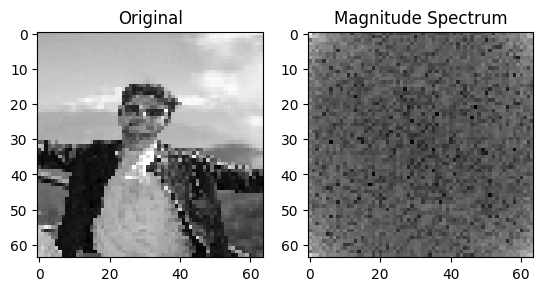

In [8]:
def dft2d(img):
    M, N = img.shape
    F = np.zeros((M, N), dtype=complex)

    for u in range(M):
        for v in range(N):
            sum = 0.0
            for x in range(M):
                for y in range(N):
                    e= np.exp(-2j * np.pi * ((u * x / M) + (v * y / N)))
                    sum += img[x, y] * e
            F[u, v] = sum
    return F

def invdft2d(F):
    M, N = F.shape
    img = np.zeros((M, N), dtype=complex)

    for x in range(M):
        for y in range(N):
            sum = 0.0
            for u in range(M):
                for v in range(N):
                    e = np.exp(2j * np.pi * ((u * x / M) + (v * y / N)))
                    sum += F[u, v] * e
            img[x, y] = sum / (M * N)
    return np.abs(img)

img = cv2.imread('photo.jpg', 0)
reduce_img = cv2.resize(img, (64, 64))

F = dft2d(reduce_img)
magnitude = np.log(1 + np.abs(F))

plt.subplot(121), plt.imshow(reduce_img, cmap='gray'), plt.title('Original')
plt.subplot(122), plt.imshow(magnitude, cmap='gray'), plt.title('Magnitude Spectrum')
plt.show()

Some Low pass filters

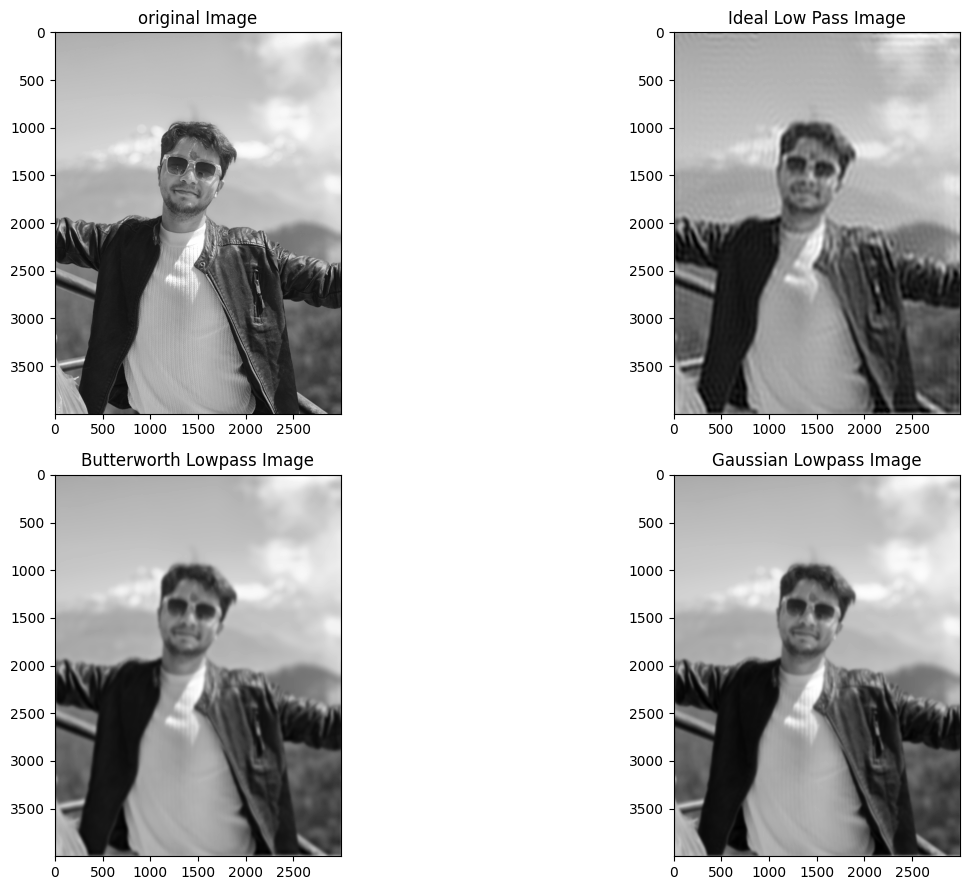

In [9]:
def apply_filter(fshift, filter_mask):
    return fshift * filter_mask

def ideal_lowpass(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    cv2.circle(mask, (ccol, crow), cutoff, 1, -1)
    return mask

def butterworth_lowpass(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows) - crow
    v = np.arange(cols) - ccol
    v, u = np.meshgrid(v, u)
    D = np.sqrt(u**2 + v**2)
    return 1 / (1 + (D / cutoff)**(2 * order))

def gaussian_lowpass(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    u = np.arange(rows) - crow
    v = np.arange(cols) - ccol
    v, u = np.meshgrid(v, u)
    D = np.sqrt(u**2 + v**2)
    return np.exp(- (D**2) / (2 * (cutoff**2)))

def filtered_img(img, filter_mask):
    fshift = np.fft.fftshift(np.fft.fft2(img))
    fshift_filtered = apply_filter(fshift, filter_mask)
    img_back = np.fft.ifft2(np.fft.ifftshift(fshift_filtered))
    return np.abs(img_back)

shape = img.shape
cutoff = 50

ILP = ideal_lowpass(shape, cutoff)
BLP = butterworth_lowpass(shape, cutoff, order = 2)
GLP = gaussian_lowpass(shape, cutoff)

Ideal_img = filtered_img(img, ILP)
Butterworth_img = filtered_img(img, BLP)
Gaussian_img = filtered_img(img, GLP)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,9))
ax1.imshow(img, cmap='gray')
ax1.set_title("original Image")
ax2.imshow(Ideal_img, cmap='gray')
ax2.set_title("Ideal Low Pass Image")
ax3.imshow(Butterworth_img, cmap='gray')
ax3.set_title("Butterworth Lowpass Image")
ax4.imshow(Gaussian_img, cmap='gray')
ax4.set_title("Gaussian Lowpass Image")
plt.tight_layout()
plt.show()

SOme High Pass Filters

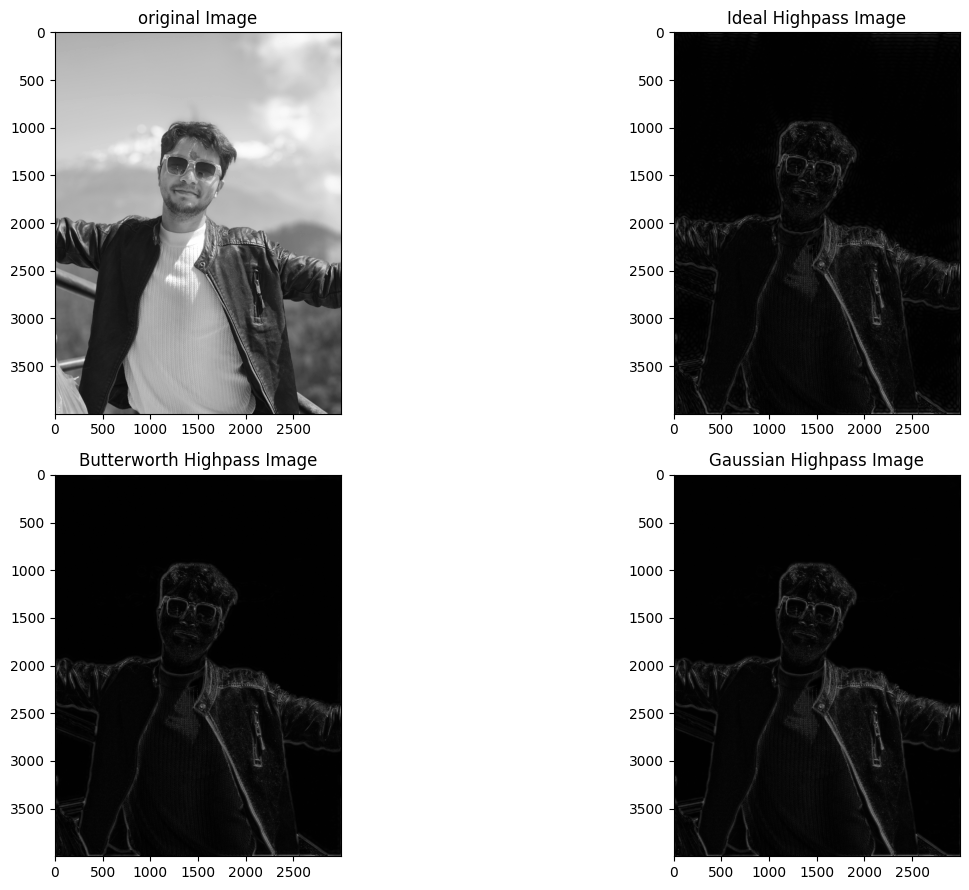

In [10]:
def ideal_highpass(shape, cutoff):
    return 1 - ideal_lowpass(shape, cutoff)

def butterworth_highpass(shape, cutoff, order):
    return 1 - butterworth_lowpass(shape, cutoff, order)

def gaussian_highpass(shape, cutoff):
    return 1 - gaussian_lowpass(shape, cutoff)

IHP = ideal_highpass(shape, cutoff)
BHP = butterworth_highpass(shape, cutoff, order = 2)
GHP = gaussian_highpass(shape, cutoff)

Ideal_HP = filtered_img(img, IHP)
Butterworth_HP = filtered_img(img, BHP)
Gaussian_HP = filtered_img(img, GHP)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,9))
ax1.imshow(img, cmap='gray')
ax1.set_title("original Image")
ax2.imshow(Ideal_HP, cmap='gray')
ax2.set_title("Ideal Highpass Image")
ax3.imshow(Butterworth_HP, cmap='gray')
ax3.set_title("Butterworth Highpass Image")
ax4.imshow(Gaussian_HP, cmap='gray')
ax4.set_title("Gaussian Highpass Image")
plt.tight_layout()
plt.show()